<a href="https://colab.research.google.com/github/khandavillisandhya/Dog_Cat_Classifier/blob/main/Image_Classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import files
import zipfile

In [2]:
# Download the zip file
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

# Unzip it
!unzip -q cats_and_dogs_filtered.zip

--2025-06-01 14:50:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.207, 142.251.163.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   227MB/s    in 0.3s    

2025-06-01 14:50:57 (227 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
train_dir = "cats_and_dogs_filtered/train"
val_dir = "cats_and_dogs_filtered/validation"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)

Classes: ['cats', 'dogs']


In [6]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5147 - loss: 0.9277 - val_accuracy: 0.5540 - val_loss: 0.6720
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5939 - loss: 0.6593 - val_accuracy: 0.6570 - val_loss: 0.6155
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7377 - loss: 0.5316 - val_accuracy: 0.6930 - val_loss: 0.5971
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8212 - loss: 0.4046 - val_accuracy: 0.6730 - val_loss: 0.6557
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8963 - loss: 0.2854 - val_accuracy: 0.6820 - val_loss: 0.6618


In [8]:
model.save("image_classifier.keras")

In [9]:
from google.colab import files
files.download("image_classifier.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from tensorflow.keras.models import load_model

model = load_model("image_classifier.keras", compile=False)

# Re-compile the model to avoid optimizer mismatch warning
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
from google.colab import files

uploaded = files.upload()  # Upload a .jpg or .png image

Saving Cat.jpg to Cat.jpg
Saving Dog.jpg to Dog.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


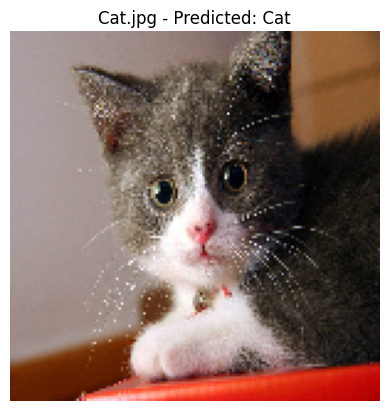

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


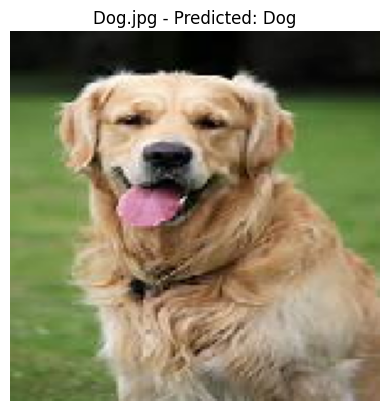

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Loop through each uploaded image
for filename in uploaded.keys():
    # Load and preprocess the image
    img = image.load_img(filename, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    predicted_class = "Dog" if prediction > 0.5 else "Cat"

    # Show image with prediction
    plt.imshow(img)
    plt.title(f"{filename} - Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()